In [1]:
import pandas as pd
from PIL import Image
import numpy as np
import os
import shutil

### Function of calculating the average brightness of an image

In [2]:
def calculate_brightness(image):
    # Convert image to grayscale
    grayscale_image = image.convert('L')

    # Get pixel values as a numpy array
    pixels = np.array(grayscale_image)

    # Calculate mean pixel value
    mean_brightness = np.mean(pixels)

    return mean_brightness

### Create new folders for underxposed and overexposed images

In [3]:
darkpath = "/Users/leiyin/Desktop/ECE253 Project/leopard.coco/images/dark/"
lightpath = "/Users/leiyin/Desktop/ECE253 Project/leopard.coco/images/light/"

if not os.path.exists(darkpath):
    os.makedirs(darkpath)

if not os.path.exists(lightpath):
    os.makedirs(lightpath)

### Create a dictionary for each image's width, height, and brightness

In [6]:
df = pd.DataFrame({'name':[],'width':[], 'height':[], 'brightness':[]})

### Update the dataframe

In [7]:
for i in range(6795):
    image = Image.open("/Users/leiyin/Desktop/ECE253 Project/leopard.coco/images/train2022/"+str(i+1).zfill(12)+".jpg")
    width, height = image.size
    brightness = calculate_brightness(image)
    new_row = pd.DataFrame({'name': [str(i+1).zfill(12)+".jpg"], 'width':width, 'height':height, 'brightness':brightness})
    df = pd.concat([df,new_row], ignore_index = True)

In [8]:
df

,name,width,height,brightness
0,000000000001.jpg,2400.0,1800.0,121.747938
1,000000000002.jpg,2400.0,1800.0,125.756531
2,000000000003.jpg,2400.0,1800.0,124.026404
3,000000000004.jpg,2400.0,1800.0,120.672041
4,000000000005.jpg,2400.0,1800.0,126.638855
...,...,...,...,...
6790,000000006791.jpg,2400.0,1800.0,161.769051
6791,000000006792.jpg,2400.0,1600.0,123.256898
6792,000000006793.jpg,2400.0,1600.0,121.988992
6793,000000006794.jpg,2400.0,1600.0,24.337033


### Brightness Levels Distributions

In [9]:
import matplotlib.pyplot as plt

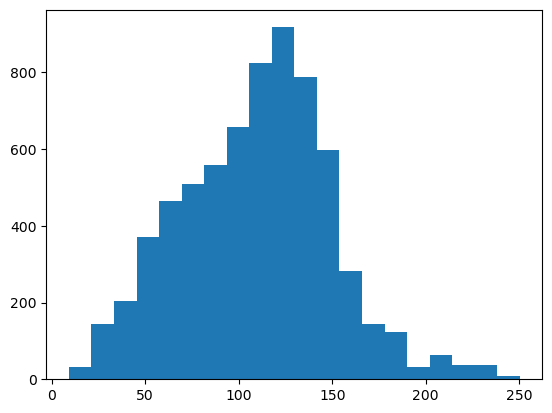

In [10]:
plt.hist(df['brightness'], bins = 20)
plt.show()

### Check pictures at various brightness level to determine the threshold

In [11]:
def find_closest_value(df, column, target):
    """
    Finds the index of the value closest to a given number in a pandas column.

    Args:
        df (pd.DataFrame): The dataframe to search.
        column (str): The name of the column to search.
        target (float): The target value.

    Returns:
        int: The index of the closest value.
    """

    # Calculate the absolute difference between each value and the target
    abs_diff = (df[column] - target).abs()

    # Find the index of the minimum absolute difference
    closest_index = abs_diff.idxmin()

    return closest_index

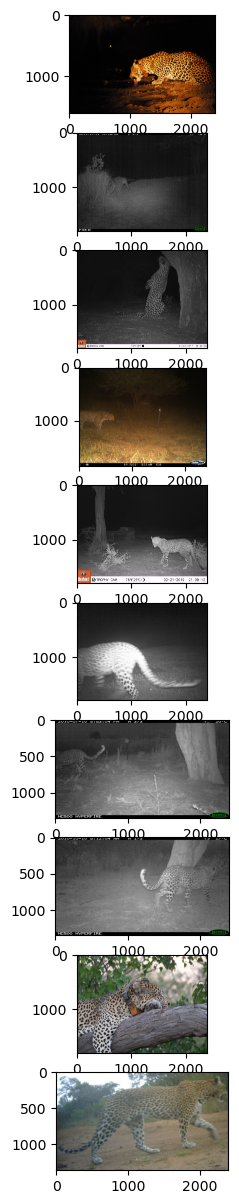

In [13]:
fig, axs = plt.subplots(10, figsize=(20, 15))
for i in range(10):
    sample_index = find_closest_value(df, 'brightness', 30 + 10 * i)
    sample_image = Image.open("/Users/leiyin/Desktop/ECE253 Project/leopard.coco/images/train2022/"+str(sample_index+1).zfill(12)+".jpg")
    axs[i].imshow(sample_image)

### We can see that the threshold is about 70, To further validate our estimation, we check more pictures with brightness level around 70.

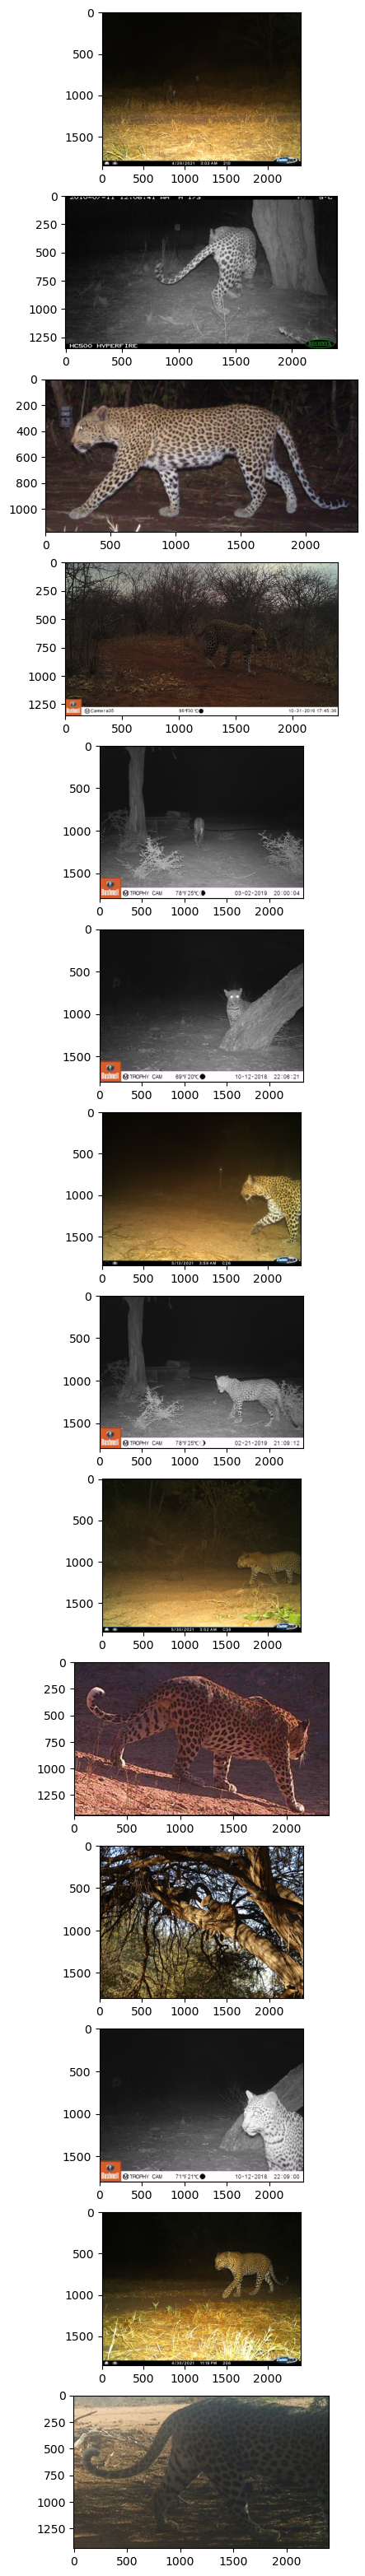

In [15]:
fig, axs = plt.subplots(14, figsize=(50, 40))
for i in range(14):
    sample_index = find_closest_value(df, 'brightness', 63 + i)
    sample_image = Image.open("/Users/leiyin/Desktop/ECE253 Project/leopard.coco/images/train2022/"+str(sample_index+1).zfill(12)+".jpg")
    axs[i].imshow(sample_image)

We observe that 65 is about a very good threshold cut point for dark and bright images

### Separate images
We use 65 as a brightness threshold, and separate images into two different folders, light and dark, We also generate a csv file containing their respective information.

In [16]:
df_dark = pd.DataFrame({'name':[],'width':[], 'height':[], 'brightness':[]})
df_light = pd.DataFrame({'name':[],'width':[], 'height':[], 'brightness':[]})

In [17]:
for i in range(6795):
    if df['brightness'][i] <= 65:
        shutil.copy("/Users/leiyin/Desktop/ECE253 Project/leopard.coco/images/train2022/"+str(i+1).zfill(12)+".jpg",darkpath)
        df_dark = pd.concat([df_dark,df.iloc[i-1:i]], ignore_index = True)
    else:
        shutil.copy("/Users/leiyin/Desktop/ECE253 Project/leopard.coco/images/train2022/"+str(i+1).zfill(12)+".jpg",lightpath)
        df_light = pd.concat([df_light,df.iloc[i-1:i]], ignore_index = True)

In [18]:
df_dark.to_excel(darkpath + 'dark_images.xlsx', index = False)
df_light.to_excel(lightpath + 'light_images.xlsx', index = False)